<a href="https://colab.research.google.com/github/mlengineer666/CODSOFT-/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import numpy as np
import pandas as pd

'check for test data'

try:
  test_data = pd.read_csv('/content/fraudTest.csv')
except:
  test_data = pd.read_csv('/content/fraudTest.csv')

test_data.head() # showing first 5 test data of this dataset




,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [95]:

test_data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [96]:

test_data.shape # to check number of rows and columns
test_data.describe() # to know the mean,standard deviation and other mathematical concepts
# test_data.info()
null_values = test_data.notnull().sum() # to check null values
null_values.fillna(0)

test_data.duplicated().sum() # to check duplicates are present in test data
test_data.isnull().sum()


,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [97]:
# Distribution of legit transactions and fraudulent transactions

test_data['is_fraud'].value_counts()
test_data[test_data['is_fraud'] == 0].count() # 0's define number of legit transactions are made
test_data[test_data['is_fraud'] == 1].count() # 1's define number of fraudulent transactions made



,0
Unnamed: 0,2145
trans_date_trans_time,2145
cc_num,2145
merchant,2145
category,2145
amt,2145
first,2145
last,2145
gender,2145
street,2145


In [98]:
# so now separating this legit and fraud part for analysis

legit = test_data[test_data['is_fraud'] == 0]
print(legit.shape)

fraud = test_data[test_data['is_fraud'] == 1]
print(fraud.shape)

(553574, 23)
(2145, 23)


In [99]:
#  Statistical Measure of legit data

legit.head()
legit.info()

legit.amt.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 553574 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             553574 non-null  int64  
 1   trans_date_trans_time  553574 non-null  object 
 2   cc_num                 553574 non-null  int64  
 3   merchant               553574 non-null  object 
 4   category               553574 non-null  object 
 5   amt                    553574 non-null  float64
 6   first                  553574 non-null  object 
 7   last                   553574 non-null  object 
 8   gender                 553574 non-null  object 
 9   street                 553574 non-null  object 
 10  city                   553574 non-null  object 
 11  state                  553574 non-null  object 
 12  zip                    553574 non-null  int64  
 13  lat                    553574 non-null  float64
 14  long                   553574 non-null  f

,amt
count,553574.000000
mean,67.614408
std,152.471931
min,1.000000
25%,9.600000
50%,47.150000
75%,82.620000
max,22768.110000


In [100]:
#  Statistical Measure of legit data

fraud.head()
fraud.info()

fraud.amt.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2145 entries, 1685 to 517571
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2145 non-null   int64  
 1   trans_date_trans_time  2145 non-null   object 
 2   cc_num                 2145 non-null   int64  
 3   merchant               2145 non-null   object 
 4   category               2145 non-null   object 
 5   amt                    2145 non-null   float64
 6   first                  2145 non-null   object 
 7   last                   2145 non-null   object 
 8   gender                 2145 non-null   object 
 9   street                 2145 non-null   object 
 10  city                   2145 non-null   object 
 11  state                  2145 non-null   object 
 12  zip                    2145 non-null   int64  
 13  lat                    2145 non-null   float64
 14  long                   2145 non-null   float64
 15  city

,amt
count,2145.000000
mean,528.356494
std,392.747594
min,1.780000
25%,214.510000
50%,371.940000
75%,907.770000
max,1320.920000


In [101]:
' Compare values for both transactions '
# test_data.astype('int').groupby('is_fraud').mean()
test_data.select_dtypes(include='number').groupby('is_fraud').mean()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,
0,277997.725990,4.179643e+17,67.614408,48846.424285,38.541406,-90.230495,88313.692365,1.380683e+09,38.540954,-90.230474
1,242057.088112,3.854274e+17,528.356494,47862.900233,39.019971,-90.445556,64529.321678,1.379587e+09,39.018618,-90.465222


Number of Fraudulent Transaction is : **2145**

So , on basis of fraudulent data we have to select legit data(sample)

In [102]:
legit_sample = legit.sample(2145)

Now concat two DataFrames fraud and legit_sample

In [103]:
new_dataset = pd.concat([legit_sample,fraud])
print(new_dataset.head(2))
print(new_dataset.tail(2))

        Unnamed: 0 trans_date_trans_time            cc_num  \
268734      268734   2020-09-28 18:25:38  2720433095629877   
26678        26678   2020-06-30 03:52:09  4265776278887457   

                                 merchant        category    amt      first  \
268734  fraud_Mante, Luettgen and Hackett  health_fitness  14.63       Mark   
26678             fraud_Parisian and Sons   gas_transport  39.89  Christine   

        last gender                     street  ...      lat     long  \
268734  Wood      M  854 Walker Dale Suite 488  ...  44.0575 -69.9656   
26678   Best      F          68248 Deanna Land  ...  35.2087 -92.2123   

        city_pop                    job         dob  \
268734      3224  Engineer, electronics  1997-08-22   
26678        969     Physicist, medical  1954-01-05   

                               trans_num   unix_time  merch_lat merch_long  \
268734  eb293ca37dd611d93a7ee389a08d42a6  1380392738  44.870985 -69.752360   
26678   6388815ca05c1d2623dc51b90

In [104]:
new_dataset['is_fraud'].value_counts()

,count
is_fraud,
0,2145
1,2145


In [105]:
new_dataset.select_dtypes(include='number').groupby('is_fraud').mean()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,
0,273356.843823,3.890088e+17,64.131254,49374.106760,38.431161,-90.214553,98134.660606,1.380543e+09,38.407384,-90.235026
1,242057.088112,3.854274e+17,528.356494,47862.900233,39.019971,-90.445556,64529.321678,1.379587e+09,39.018618,-90.465222


Split the data into 2 parts X and Y

In [106]:
x = new_dataset.drop(columns='is_fraud',axis=1)
y = new_dataset['is_fraud']
x
y
x.head(2)
y.head(2)

,is_fraud
268734,0
26678,0


In [107]:
copy_data = new_dataset.copy()
copy_data.head()
copy_data = copy_data.drop_duplicates()
copy_data = copy_data.drop('trans_date_trans_time',axis=1)
copy_data.head()


,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
268734,268734,2720433095629877,"fraud_Mante, Luettgen and Hackett",health_fitness,14.63,Mark,Wood,M,854 Walker Dale Suite 488,Bowdoin,...,44.0575,-69.9656,3224,"Engineer, electronics",1997-08-22,eb293ca37dd611d93a7ee389a08d42a6,1380392738,44.870985,-69.752360,0
26678,26678,4265776278887457,fraud_Parisian and Sons,gas_transport,39.89,Christine,Best,F,68248 Deanna Land,Enola,...,35.2087,-92.2123,969,"Physicist, medical",1954-01-05,6388815ca05c1d2623dc51b9013050a0,1372564329,35.946835,-92.458164,0
495065,495065,4424338559877976,fraud_Daugherty LLC,kids_pets,136.94,Denise,Barnett,F,23220 Eaton Harbors,Kirby,...,40.8130,-83.4196,118,Private music teacher,1957-11-12,72a78ea604f822dc730b7590b56c934d,1387390484,41.623596,-83.813219,0
419501,419501,4509922033272157,"fraud_Baumbach, Strosin and Nicolas",shopping_pos,3.96,Monica,West,F,22084 Smith Roads Suite 776,Hurley,...,43.2893,-97.1904,811,Neurosurgeon,1972-03-28,a4f1eeb56513df3174923a86c0081db7,1385909796,44.071215,-97.684434,0
297153,297153,4587577161160601,fraud_Jacobi and Sons,shopping_pos,2.46,Tina,Lawrence,F,12444 Jacob Pines,Nobleboro,...,44.0943,-69.4828,1643,Financial trader,1976-04-12,39b27186f2622cbef0e0cdb033961be0,1381504878,43.480906,-69.440746,0


split this data into 2 training data(x,y) and 2 test data(x,y)

In [108]:
numeric_columns = copy_data.select_dtypes(include='number').columns
print(numeric_columns)

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [109]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=13 )

print(x.shape,x_train.shape,x_test.shape)


(4290, 22) (3003, 22) (1287, 22)


Feature scaling

In [110]:
from sklearn.preprocessing import StandardScaler

def Standard_Scalaer(copy_data,col_names):
  features = copy_data[col_names]
  scaler = StandardScaler().fit(features.values)
  features = scaler.transform(features.values)
  copy_data[col_names] = features
  return copy_data


In [111]:
col_names = ['amt']
x_train = Standard_Scalaer(x_train,col_names)
x_test = Standard_Scalaer(x_test,col_names)

Baseline (no oversampling)

In [112]:
# Cross validation

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

kf = StratifiedKFold(n_splits = 5,shuffle = False)

In [113]:
rf = RandomForestClassifier(n_estimators=100,random_state=13)

In [114]:
from sklearn.model_selection import cross_val_score

# Drop non-numeric columns from x_train and x_test
x_train_numeric = x_train.select_dtypes(include=np.number)
x_test_numeric = x_test.select_dtypes(include=np.number)

scores = cross_val_score(rf,x_train_numeric,y_train,cv=kf,scoring='recall')
print(f'Cross validation Recall scores:{scores}')
print(f'Avergae cross validation scores : {scores.mean()}')

Cross validation Recall scores:[0.85714286 0.89700997 0.92       0.89666667 0.91      ]
Avergae cross validation scores : 0.8961638981173865


In [115]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators':[50,100,200],
    'max_depth':[4,6,10,12],
    'random_state':[13]
}

grid_rf = GridSearchCV(rf,param_grid = parameters,cv=kf,scoring='recall').fit(x_train_numeric,y_train)
print(f'Best parameters:{grid_rf.best_params_}')
print(f'Best score :',grid_rf.best_score_)

Best parameters:{'max_depth': 12, 'n_estimators': 200, 'random_state': 13}
Best score : 0.8868460686600221


In [116]:
y_pred = grid_rf.predict(x_test_numeric)

In [117]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score

cm = confusion_matrix(y_test,y_pred)
rf_Recall = recall_score(y_test,y_pred)
rf_Precision = precision_score(y_test,y_pred)
rf_f1 = f1_score(y_test,y_pred)
rf_accuracy = accuracy_score(y_test,y_pred)

print(cm)

[[599  45]
 [110 533]]


In [118]:
ndf = [(rf_Recall,rf_Precision,rf_f1,rf_accuracy)]

rf_score = pd.DataFrame(data=ndf,columns=['Recall','Precision','F1 score','Accuracy'])
rf_score.insert(0,'Random Forest With','No under sampling')
rf_score

,Random Forest With,Recall,Precision,F1 score,Accuracy
0,No under sampling,0.828927,0.922145,0.873055,0.879565


Random Oversampling

Purpose: Balances class distribution by duplicating minority class samples.

Used in: Imbalanced datasets like fraud detection.

How: Randomly replicates minority class data points.

Goal: Improve recall and overall model performance.

Limitation: May cause overfitting (since it duplicates exact records).



In [119]:
# oversampling techniques

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_over,y_over = ros.fit_resample(x_train_numeric,y_train)


print('Genuine :',y_over.value_counts()[0], '/',round(y_over.value_counts()[0]/len(y_over)*100,2), '% of the dataset')
print('Fraudulent :',y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over)*100,2), '% of the dataset')

Genuine : 1502 / 50.0 % of the dataset
Fraudulent : 1502 / 50.0 % of the dataset


Pipeline

In [120]:
from imblearn.pipeline import Pipeline, make_pipeline

random_pipeline = make_pipeline(RandomOverSampler(random_state=42),RandomForestClassifier(n_estimators=100,random_state=13))


score2 = cross_val_score(random_pipeline,x_train_numeric,y_train,cv=kf,scoring='recall')
print(f'Cross validation Recall scores:{score2}')
print(f'Avergae cross validation scores : {score2.mean()}')



Cross validation Recall scores:[0.85714286 0.89700997 0.92333333 0.89666667 0.90666667]
Avergae cross validation scores : 0.8961638981173865


GridSearchCV

In [121]:
new_params = {
    'randomforestclassifier__' + key:parameters[key] for key in parameters
}

grid_over_rf = GridSearchCV(random_pipeline,param_grid = new_params,cv=kf,scoring='recall',return_train_score=True).fit(x_train_numeric,y_train)
print(f'Best parameters:',grid_over_rf.best_params_)
print(f'Best score :',grid_over_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': 12, 'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__random_state': 13}
Best score : 0.8861794019933555


Random Undersampling

In [122]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=13)
x_under,y_under = rus.fit_resample(x_train_numeric,y_train)

print('Genuine :',y_under.value_counts()[0],'/',round(y_under.value_counts()[0]/len(y_under)*100,2), '% of the dataset')

print('Fraudulent :',y_under.value_counts()[1],'/',round(y_under.value_counts()[1]/len(y_under)*100,2), '% of the dataset')





Genuine : 1501 / 50.0 % of the dataset
Fraudulent : 1501 / 50.0 % of the dataset


Training Model

In [123]:
from imblearn.over_sampling import SMOTE

smote_pipeline = make_pipeline(SMOTE(random_state=42),RandomForestClassifier(n_estimators=100,random_state=13))

score3 = cross_val_score(smote_pipeline,x_train_numeric,y_train,scoring='recall',cv=kf)
print(f'Cross Validation Recall Scores are: {score3}')
print(f'Average cross validation scores : {score3.mean()}')




Cross Validation Recall Scores are: [0.85714286 0.89700997 0.92       0.9        0.90666667]
Average cross validation scores : 0.8961638981173865


In [124]:
new_params = {'randomforestclassifier__' + key: parameters[key] for key in parameters}
smote_rf = GridSearchCV(smote_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
smote_rf.fit(x_train_numeric, y_train)

print(f'Best parameters: {smote_rf.best_params_}')
print(f'Best score: {smote_rf.best_score_}')


Best parameters: {'randomforestclassifier__max_depth': 12, 'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__random_state': 13}
Best score: 0.8868460686600221


In [125]:
y_pred = smote_rf.best_estimator_.named_steps['randomforestclassifier'].predict(x_test_numeric)

cm = confusion_matrix(y_test,y_pred)

smote_rf_recall = recall_score(y_test,y_pred)
smote_rf_precision = precision_score(y_test,y_pred)
smote_rf_f1 = f1_score(y_test,y_pred)
smote_rf_accuracy = accuracy_score(y_test,y_pred)

print(cm)


[[599  45]
 [111 532]]


In [126]:
ndf = [(smote_rf_recall,smote_rf_precision,smote_rf_f1,smote_rf_accuracy)]

smote_rf_score = pd.DataFrame(data=ndf,columns=['Recall','Precision','F1 score','Accuracy'])
smote_rf_score.insert(0,'random forest with','SMOTE oversampling')
smote_rf_score




,random forest with,Recall,Precision,F1 score,Accuracy
0,SMOTE oversampling,0.827372,0.92201,0.872131,0.878788


Under sampling using Tomek links

In [127]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()

# fit and apply transfer
x_under_tl,y_under_tl  = tl.fit_resample(x_train_numeric,y_train)


print('Genuine',y_under_tl.value_counts()[0],'/',round(y_under_tl.value_counts()[0]/len(y_under_tl)*100,2),'% of the data')

print('Genuine',y_under_tl.value_counts()[1],'/',round(y_under_tl.value_counts()[1]/len(y_under_tl)*100,2),'% of the data')





Genuine 1501 / 50.02 % of the data
Genuine 1500 / 49.98 % of the data


Combining SMOTE and TomekLinks

In [128]:
from imblearn.combine import SMOTETomek

SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),RandomForestClassifier(n_estimators=100,random_state=13))

SMOTETomek_rf = SMOTETomek_pipeline
SMOTETomek_rf.fit(x_train_numeric,y_train)


Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=13))])

confusion matrix and the scores of joining smoteANDtomek

In [129]:
y_pred = SMOTETomek_rf.predict(x_test_numeric)

cm = confusion_matrix(y_test,y_pred)

SMOTETomek_rf_recall = recall_score(y_test,y_pred)
SMOTETomek_rf_precision = precision_score(y_test,y_pred)
SMOTETomek_rf_f1 = f1_score(y_test,y_pred)
SMOTETomek_rf_accuracy = accuracy_score(y_test,y_pred)

print(cm)


[[598  46]
 [ 97 546]]


In [130]:
ndf = [(SMOTETomek_rf_recall,SMOTETomek_rf_precision,SMOTETomek_rf_f1,SMOTETomek_rf_accuracy)]

SMOTEtomek_rf_score = pd.DataFrame(data=ndf,columns=['Recall','Precision','F1 score','Accuracy'])
SMOTEtomek_rf_score.insert(0,'random forest with','SMOTE + Tomek')
SMOTEtomek_rf_score


,random forest with,Recall,Precision,F1 score,Accuracy
0,SMOTE + Tomek,0.849145,0.922297,0.884211,0.888889


Class_weights: this very important for our model w/o this model treats each point as equally

In [131]:
rfb = RandomForestClassifier(n_estimators=100,random_state=13,class_weight='balanced')

score5 = cross_val_score(rfb,x_train_numeric,y_train,cv=kf,scoring='recall')

print(f"Cross validation recall scores are :{score5}")

print(f"Cross validation recall scores are :{score5.mean()}")



Cross validation recall scores are :[0.85714286 0.89700997 0.92       0.9        0.92      ]
Cross validation recall scores are :0.8988305647840532


In [132]:
grid_rfb = GridSearchCV(rfb,param_grid=parameters,cv=kf,scoring='recall',return_train_score=True).fit(x_train_numeric,y_train)

y_pred = grid_rfb.predict(x_test_numeric)
cm = confusion_matrix(y_test,y_pred)
grid_rfb_recall = recall_score(y_test,y_pred)
grid_rfb_precision = precision_score(y_test,y_pred)
grid_rfb_f1 = f1_score(y_test,y_pred)
grid_rfb_accuracy = accuracy_score(y_test,y_pred)

print(cm)


[[586  58]
 [116 527]]


In [133]:
ndf = [(grid_rfb_recall,grid_rfb_precision,grid_rfb_f1,grid_rfb_accuracy)]

grid_rfb_score = pd.DataFrame(data=ndf,columns=['Recall','Precision','F1 score','Accuracy'])
grid_rfb_score.insert(0,'random forest with','class_weight')
grid_rfb_score



,random forest with,Recall,Precision,F1 score,Accuracy
0,class_weight,0.819596,0.900855,0.858306,0.864802


Performance comparision

In [134]:
'''
predictions = pd.concat([rf_score,smote_rf_score,grid_rfb_score],ignore_index=True,sort=False)

predictions.sort_values(by=['Recall'],ascending=False)

'''


"\npredictions = pd.concat([rf_score,smote_rf_score,grid_rfb_score],ignore_index=True,sort=False)\n\npredictions.sort_values(by=['Recall'],ascending=False)\n\n"

Using AUC-Roc curve for RF and Class_weight

ROC-AUC score for random forest with class weight: 0.8647667668054442


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


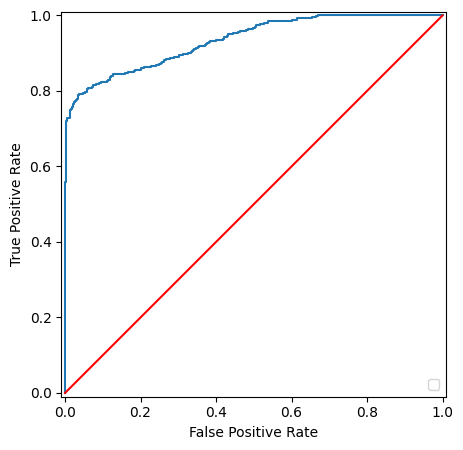

In [135]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt


ROCAUCscore = roc_auc_score(y_test,y_pred)
print(f"ROC-AUC score for random forest with class weight: {ROCAUCscore}")

y_proba = grid_rfb.predict_proba(x_test_numeric)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay


def plot_auc_roc_curve(y_test,y_pred):
  fpr,tpr,_ = roc_curve(y_test,y_pred)
  roc_display = RocCurveDisplay(fpr=fpr,tpr=tpr).plot()
  roc_display.figure_.set_size_inches(5,5)
  plt.plot([0,1],[0,1],color='red')


plot_auc_roc_curve(y_test,y_proba[:,1])





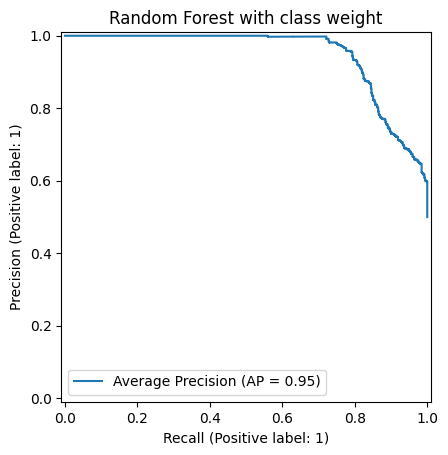

In [136]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay


display = PrecisionRecallDisplay.from_estimator(grid_rfb,x_test_numeric,y_test,name='Average Precision')

_ = display.ax_.set_title('Random Forest with class weight')
